In [26]:
import matplotlib.pyplot as plt
import numpy as np

#Using only NumPy, implement batch gradient descent for softmax regression. Train this classifier on the Iris dataset, demonstrating the process without relying on Scikit-learn.

## 1. Load the Iris data as provided in the notebook of the assignment. Add the bias term for every instance (x0 = 1).

In [27]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris(as_frame=True)

In [4]:
# print(iris)

load the data (take the petal length and petal width).

In [28]:
X = iris.data.iloc[:, [2, 3]].values
y = iris.target.values

add the bias term for every instance ($x_0 = 1$).

In [29]:
X_with_bias = np.c_[np.ones((len(X), 1)), X]
# print(X_with_bias)

split the dataset into a training set, a validation set and a test set manually:

In [30]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size
# print(train_size)
np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

# print(y_train)
# print(y_valid.shape)
# print(y_test.shape)

## 2. The targets are class indices (0, 1 or 2). They have to turn to class probabilities to train the Softmax Regression model. Each instance must show a probability equal to 0.0 for all classes except for the target class (1.0) (so the class probability vectors should be a one-hot vector). Write a function to convert the vector of class indices to a matrix of one-hot vector for each instance.


In [31]:
def to_one_hot(y):

    y=np.array(y).astype(int)
    n_samples = y.shape[0]
    n_classes = len(np.unique(y))
    one_hot = np.zeros((n_samples, n_classes))
    for i, val in enumerate(y):
        one_hot[i, val] = 1
    return one_hot

Check with the expected out put to make sure your code is doing the right thing:

In [32]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [33]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)
print(Y_train_one_hot.shape)
print(Y_valid_one_hot.shape)
print(Y_test_one_hot.shape)

(90, 3)
(30, 3)
(30, 3)


## 3. Normalize the data using Z-Score Normalization and define the softmax function to be used later.

In [34]:
# fill the following lines
mean = np.mean(X_train[:,1:], axis=0)
std = np.std(X_train[:, 1:], axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

print(np.shape(X_train))
print(np.shape(X_valid))
print(np.shape(X_test))

(90, 3)
(30, 3)
(30, 3)


In [35]:
def softmax(logits):
    exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [36]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

In [37]:
print(n_inputs)
print(n_outputs)

3
3


## 4. Implement the gradient step using numpy. Make sure about the dimensions and the correctness of your calculations.

turn  the math equations into Python code.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [38]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)


# fill the following lines:
for epoch in range(n_epochs):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid.dot(Theta))
        xentropy_losses = -np.sum(Y_valid_one_hot * np.log(Y_proba_valid + epsilon), axis=1)
        # print(epoch, xentropy_losses.sum(axis=1).mean())
        print(epoch, np.mean(xentropy_losses))
    # print(np.shape(Y_proba_valid))
    # print(np.shape(Y_train_one_hot))
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.14519367480830644
2000 0.1301309575504088
3000 0.12009639326384539
4000 0.11372961364786889
5000 0.11002459532472424


In [39]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [40]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

## 5. Document and plot the results of your model.

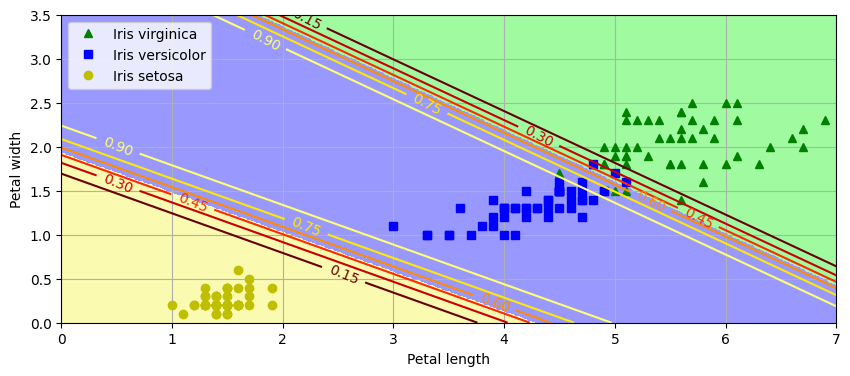

In [41]:
import matplotlib as mpl

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()